# Behavioral state from trial outcomes
This notebook describes how to load and process data from {cite}`Hulsey2024` to evaluate the behavioral state of mice performing perceptual decision tasks, given trial outcomes. Behavioral state estimation is performed using a Hidden Markov Model with Generalized Linear Model emisions (GLM-HMM). The notebook also shows how to evaluate the relation between these behavioral states and arousal (as indexed by pupil size) and uninstructed movements (such as locomotion).

### Environment Setup

In [1]:
try:
    from databook_utils.dandi_utils import dandi_download_open
except:
    !git clone https://github.com/AllenInstitute/openscope_databook.git
    %cd openscope_databook
    %pip install -e .

  Obtaining dependency information for ruamel.yaml<1,>=0.15 from https://files.pythonhosted.org/packages/73/67/8ece580cc363331d9a53055130f86b096bf16e38156e33b1d3014fffda6b/ruamel.yaml-0.18.6-py3-none-any.whl.metadata
  Obtaining dependency information for semantic-version from https://files.pythonhosted.org/packages/6a/23/8146aad7d88f4fcb3a6218f41a60f6c2d4e3a72de72da1825dc7c8f7877c/semantic_version-2.10.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for tenacity from https://files.pythonhosted.org/packages/61/a1/6bb0cbebefb23641f068bb58a2bc56da9beb2b1c550242e3c540b37698f3/tenacity-8.3.0-py3-none-any.whl.metadata
  Obtaining dependency information for yarl~=1.9 from https://files.pythonhosted.org/packages/c3/a0/0ade1409d184cbc9e85acd403a386a7c0563b92ff0f26d138ff9e86e48b4/yarl-1.9.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for zarr-checksum~=0.4.0 from https://files.pythonhosted.org/packages/35/8c/e7d56ac21

  Obtaining dependency information for networkx>=2.2 from https://files.pythonhosted.org/packages/38/e9/5f72929373e1a0e8d142a130f3f97e6ff920070f87f91c4e13e40e0fba5a/networkx-3.3-py3-none-any.whl.metadata
  Obtaining dependency information for imageio>=2.4.1 from https://files.pythonhosted.org/packages/a3/b6/39c7dad203d9984225f47e0aa39ac3ba3a47c77a02d0ef2a7be691855a06/imageio-2.34.1-py3-none-any.whl.metadata
  Obtaining dependency information for PyWavelets>=1.1.1 from https://files.pythonhosted.org/packages/6e/01/a7157eec994747d3825df3e327365e072e5c80408000a358f2431cf91eb2/pywavelets-1.6.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for patsy>=0.5.2 from https://files.pythonhosted.org/packages/43/f3/1d311a09c34f14f5973bb0bb0dc3a6e007e1eda90b5492d082689936ca51/patsy-0.5.6-py2.py3-none-any.whl.metadata
  Obtaining dependency information for natsort from https://files.pythonhosted.org/packages/ef/82/7a9d0550484a62c6da82858ee9419f3

  Using cached argschema-2.0.2.tar.gz (24 kB)
  Preparing metadata (setup.py) ... done
  Obtaining dependency information for opencv-python<5.0 from https://files.pythonhosted.org/packages/d9/64/7fdfb9386511cd6805451e012c537073a79a958a58795c4e602e538c388c/opencv_python-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for pytest-cov from https://files.pythonhosted.org/packages/78/3a/af5b4fa5961d9a1e6237b530eb87dd04aea6eb83da09d2a4073d81b54ccf/pytest_cov-5.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for pypdf2 from https://files.pythonhosted.org/packages/8e/5e/c86a5643653825d3c913719e788e41386bee415c2b87b4f955432f2de6b2/pypdf2-3.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for marshmallow==3.0.0rc6 from https://files.pythonhosted.org/packages/dd/d6/b6b2b90a9e10edf99a8bea3bc5200619829f04c9d9c0c5b3839d68baf072/marshmallow-3.0.0rc6-py2.py3-none-any.whl.metadata
  Obtaining dependency inform

  Obtaining dependency information for itk-numerics>=5.3.0 from https://files.pythonhosted.org/packages/78/e2/869bb2329f2c231cca1bd1ba9ed1dbae2677e187926ffb68d1dcc69e0c6c/itk_numerics-5.4.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for itk-meshtopolydata>=0.10 from https://files.pythonhosted.org/packages/ed/33/39cf62305716b4651f45ba1d3d8fe0278886c102e7ed38199418ac910f22/itk_meshtopolydata-0.10.0-cp310-cp310-manylinux_2_28_x86_64.whl.metadata
  Obtaining dependency information for ipydatawidgets<4.3.3,>=4.0.1 from https://files.pythonhosted.org/packages/29/75/b654fe4a12e45313642119ed09f90a52af7220bc97e016e87cc7270b9167/ipydatawidgets-4.3.2-py2.py3-none-any.whl.metadata
  Obtaining dependency information for zstandard from https://files.pythonhosted.org/packages/c9/79/07f6d2670fa2708ae3b79aabb82da78e9cbdb08d9bafadf8638d356775ff/zstandard-0.22.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information fo

  Obtaining dependency information for async-timeout<5.0,>=4.0 from https://files.pythonhosted.org/packages/a7/fa/e01228c2938de91d47b307831c62ab9e4001e747789d0b05baf779a6488c/async_timeout-4.0.3-py3-none-any.whl.metadata
  Obtaining dependency information for opencv-python-headless from https://files.pythonhosted.org/packages/71/19/3c65483a80a1d062d46ae20faf5404712d25cb1dfdcaf371efbd67c38544/opencv_python_headless-4.9.0.80-cp37-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for fastremap from https://files.pythonhosted.org/packages/38/d4/4186ca695a83fb757c08c1b670ead31fe45299a544ca41e37537081951b8/fastremap-1.14.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for imagecodecs from https://files.pythonhosted.org/packages/06/fe/93a82442733c50dbe94b8fa757c7cdb6769073b6576e0f9f3974225d1e4c/imagecodecs-2024.1.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaini

  Obtaining dependency information for tomli from https://files.pythonhosted.org/packages/97/75/10a9ebee3fd790d20926a90a2547f0bf78f371b2f13aa822c759680ca7b9/tomli-2.0.1-py3-none-any.whl.metadata
  Obtaining dependency information for pydantic-compat>=0.1.0 from https://files.pythonhosted.org/packages/7f/65/2edf586ff7b3dfc520977c6529c9b718c86ef8459ece088f1ef1f74bf1d4/pydantic_compat-0.1.2-py3-none-any.whl.metadata
  Obtaining dependency information for xsdata<24.4,>=23.6 from https://files.pythonhosted.org/packages/e9/ac/27a6fcf61c64549a17b9eaa087ae7876417b5ed9efb6efdec8b52289cae4/xsdata-24.3.1-py3-none-any.whl.metadata
  Obtaining dependency information for locket from https://files.pythonhosted.org/packages/db/bc/83e112abc66cd466c6b83f99118035867cecd41802f8d044638aa78a106e/locket-1.0.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gast<0.5,>=0.4.0 from https://files.pythonhosted.org/packages/b6/48/583c032b79ae5b3daa02225a675aeb673e58d2cb698e78510feceb11958c/gast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 19.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 17.0 MB/s eta 0:00:00m eta 0:00:010:01:01
Using cached pynwb-2.2.0-py3-none-any.whl (126 kB)
Using cached quantities-0.14.1-py3-none-any.whl (87 kB)
Using cached remfile-0.1.10-py3-none-any.whl (11 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.9/13.9 MB 14.2 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 16.1 MB/s eta 0:00:00m eta 0:00:010:00:01
Using cached statsmodels-0.14.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.1 MB)
Using cached suite2p-0.12.1-py3-none-any.whl (648 kB)
Using cached zarr-2.13.3-py3-none-any.whl (191 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 5.5 MB/s eta 0:00:000m eta 0:00:010:00:02
Using cached nvidia_cublas_cu11-11.10.3.66-py3-none-manylinux1_x86_64.whl (317.1 MB)
Using cached nvidia_cuda_nvrtc_cu11-11.7.99-2-py3-none

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.2/80.2 MB 14.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 MB 15.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 MB 16.9 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 22.2 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.4/295.4 kB 27.9 MB/s eta 0:00:00
Using cached multidict-6.0.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (124 kB)
Using cached ome_types-0.5.1.post1-py3-none-any.whl (248 kB)
Using cached partd-1.4.2-py3-none-any.whl (18 kB)
Using cached py2vega-0.6.1-py3-none-any.whl (16 kB)
Using cached pythreejs-2.4.2-py3-none-any.whl (3.4 MB)
Using cached QtPy-2.4.1-py3-none-any.whl (93 kB)
Using cached ruamel.yaml.clib-0.2.8-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (526 kB)
Using cached threadpoolctl-3.5.0-py3-n

This notebook requires the package **ssm** (*SSM: Bayesian learning and inference for state space models*):

In [3]:
from dandi import dandiapi
from pynwb import NWBHDF5IO
import numpy as np
import warnings
import re
import ssm
import matplotlib.pyplot as plt
import random
import ssm

## Load NWB file with behavior data

In [4]:
dandiset_id = "000678"
dandi_filepath = "sub-BW058/sub-BW058_ses-20220302T092729.nwb"
download_loc = "."
dandi_api_key = None

In [5]:
# Ignore "UserWarning: Ignoring cached namespace..." warning from pynwb 
msg = "Ignoring cached namespace"
warnings.filterwarnings("ignore", message=msg)

In [6]:
# This can sometimes take a while depending on the size of the file
io = dandi_download_open(dandiset_id, dandi_filepath, download_loc, dandi_api_key=dandi_api_key)
nwb = io.read()

A newer version (0.62.0) of dandi/dandi-cli is available. You are using 0.61.2


File already exists
Opening file


In [7]:
print(nwb.session_description)

Behavior data. Two-alternative choice visual/auditory discrimination.


## Preprocess the trial data

Some of the variables in our table of trials contain enumerated values. For example, `choice` can be either `0`, `1` or `2` representing *left*, *right*, or *no_lick*, respectively. This mapping is stored in the description field of each variable in the NWB file. The following function loads the data and these mappings.

In [8]:
def read_trial_data(nwbFileObj):
    """
    Return trial information and dictionary mapping labels to integer values from open nwb file.
    Args:
        nwbFileObj (object): an open nwbfile object.
    Returns:
        trial_data (pd.DataFrame): each rows is one trial, columns are variables recorded on each trial.
        trial_labels (dict): dictionary of dictionaries containing mapping of values to labels.
    """
    trial_data = nwbFileObj.trials.to_dataframe()
    stage = nwbFileObj.lab_meta_data['metadata'].training_stage
    trial_data['stage'] = stage  # Add the training stage to the dataframe
      
    # Create dict of trial_labels stored in the description of each trial variable
    trial_labels = {}
    pattern = r"MAP:(\{.*\})"
    for key in nwbFileObj.trials.colnames:
        match = re.search(pattern, nwbFileObj.trials[key].description)
        if match:
            dict_string = match.group(1)
            trial_labels[key] = eval(dict_string)
    return trial_data, trial_labels

To read the trial data we can simply run:

In [9]:
trial_data, trial_labels = read_trial_data(nwb)

We end up with a pandas dataframe with the trial data:

In [10]:
trial_data

,start_time,stop_time,target_modality,cue_time,cue_ID,cue_duration,stimulus_type,stimulus_time,stimulus_duration,target_port,auditory_stim_id,auditory_stim_band,auditory_stim_difficulty,visual_stim_id,visual_stim_oreintation,visual_stim_difficulty,visual_gabor_angle,outcome,choice,stage
id,,,,,,,,,,,,,,,,,,,,
0,94.522700,96.847282,1.0,94.522700,0.0,0.0,0.0,94.522700,1200.0,1.0,2.0,1.0,NaN,1.0,0.0,1.0,72.0,1.0,1.0,S5
1,105.455613,106.769102,1.0,105.455613,0.0,0.0,0.0,105.455613,1200.0,0.0,2.0,1.0,NaN,0.0,1.0,1.0,18.0,1.0,0.0,S5
2,117.941465,119.180153,1.0,117.941465,0.0,0.0,0.0,117.941465,1200.0,1.0,2.0,1.0,NaN,1.0,0.0,1.0,72.0,2.0,0.0,S5
3,125.832542,128.092601,1.0,125.832542,0.0,0.0,0.0,125.832542,1200.0,1.0,2.0,1.0,NaN,1.0,0.0,0.0,90.0,1.0,1.0,S5
4,135.777700,137.091280,1.0,135.777700,0.0,0.0,0.0,135.777700,1200.0,0.0,2.0,1.0,NaN,0.0,1.0,1.0,18.0,1.0,0.0,S5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,5303.089595,5305.333957,1.0,5303.089595,0.0,0.0,0.0,5303.090593,1200.0,1.0,2.0,1.0,NaN,1.0,0.0,1.0,72.0,16.0,2.0,S5
623,5311.121157,5313.362926,1.0,5311.121157,0.0,0.0,0.0,5311.122102,1200.0,1.0,2.0,1.0,NaN,1.0,0.0,2.0,54.0,16.0,2.0,S5
624,5319.577562,5321.812414,1.0,5319.577562,0.0,0.0,0.0,5319.578559,1200.0,1.0,2.0,1.0,NaN,1.0,0.0,1.0,72.0,16.0,2.0,S5


And a dictionary of labels for categorical (enumerated) variables:

In [11]:
trial_labels

{'target_modality': {'auditory': 0, 'visual': 1},
 'cue_ID': {'A': 0, 'B': 1},
 'stimulus_type': {'target': 0, 'distractor': 1, 'both': 2},
 'target_port': {'left': 0, 'right': 1},
 'auditory_stim_id': {'left': 0, 'right': 1, 'no stim': 2},
 'auditory_stim_band': {'low_band': 0, 'high_band': 1},
 'visual_stim_id': {'left': 0, 'right': 1, 'no stim': 2},
 'visual_stim_oreintation': {'horizontal': 0, 'vertical': 1},
 'visual_stim_difficulty': {'45': 0, '36': 1, '27': 2, '18': 3, '9': 4},
 'outcome': {'timeout': 0,
  'hit': 1,
  'miss': 2,
  'false_alarm': 4,
  'correct_reject': 8,
  'incorrect_reject': 16},
 'choice': {'left': 0, 'right': 1, 'no_lick': 2}}

Because of the way stimulus values are stored, we also need to perform some preprocessing and convert stimulus values to a normalized scale in the range (-1, 1) for the target stimulus (either visual or auditory) of a given session. We achieve this normalization with the following function.

In [12]:
def normalize_stim_values(trial_data, trial_labels):
    """
    Normalize stimulus values to range (-1, 1).
    
    Args:
        trial_data (pd.DataFrame): each rows is one trial, columns are variables recorded on each trial.
        trial_labels (dict): dictionary of dictionaries containing mapping of values to labels.
        
    Returns:
        vis_stim (np.array):
        aud_stim (np.array):
    """
    aud_stim_direction = trial_data['auditory_stim_id'].values
    aud_stim_direction[np.where(aud_stim_direction==trial_labels['auditory_stim_id']['left'])[0]]=-1
    aud_stim_direction[np.where(aud_stim_direction==trial_labels['auditory_stim_id']['right'])[0]]=1
    aud_stim_direction[np.where(aud_stim_direction==trial_labels['auditory_stim_id']['no stim'])[0]]=np.nan
    aud_stim_value = trial_data['auditory_stim_difficulty'].values
    aud_stim_value = aud_stim_value-(1-aud_stim_value)/2
    aud_stim = aud_stim_direction*aud_stim_value

    vis_stim_direction =  trial_data['visual_stim_id'].values
    vis_stim_direction[np.where(vis_stim_direction==trial_labels['visual_stim_id']['left'])[0]]=-1
    vis_stim_direction[np.where(vis_stim_direction==trial_labels['visual_stim_id']['right'])[0]]=1
    vis_stim_direction[np.where(vis_stim_direction==trial_labels['visual_stim_id']['no stim'])[0]]=np.nan
    if any(trial_data.columns == 'visual_stim_difficulty'):
        vis_val = trial_data['visual_stim_difficulty'].values 
    else:
        vis_val = trial_data['visual_stim_id'].values
    vis_stim_id = np.zeros(len(trial_data))
    if any(trial_data.columns.values==['visual_gabor_angle']):
        stim_val = trial_data['visual_gabor_angle'].values
        stim_val = stim_val[~np.isnan(stim_val)]
        stim_val = ((stim_val - 45)/45)
        stim_val = np.flip(np.unique(abs(stim_val)))
        if len(stim_val)>0:
            for this_diff in np.flip(np.unique(vis_val)):
                ind = np.where(vis_val==this_diff)[0]
                vis_stim_id[ind]=stim_val[int(this_diff)]
    else:
        vis_stim_id[vis_val==1]=.8
        vis_stim_id[vis_val==2]=.6
        vis_stim_id[vis_val==0]=1
    vis_stim = vis_stim_direction*vis_stim_id
    return (vis_stim, aud_stim)


In this notebook, we will focus only on the target modality for a given session (either visual or auditory), so we will add one column to our dataframe with the normalized stimulus values for just that modality:

In [13]:
vis_stim, aud_stim = normalize_stim_values(trial_data, trial_labels)
if trial_data['target_modality'][0] == trial_labels['target_modality']['auditory']:
    trial_data['normalized_stim'] = aud_stim
elif trial_data['target_modality'][0] == trial_labels['target_modality']['visual']:
    trial_data['normalized_stim'] = vis_stim

We can test that our normalized stimulus values are now between -1 and 1 (with np.nan when stimuli from a different modality are presented).

In [14]:
np.unique(trial_data['normalized_stim'])

array([-1. , -0.6, -0.2,  0.2,  0.6,  1. ])

## Estimate psychometric performance across all trials

We first create a function to estimate the performance for each stimulus value (given the dataframe with trial data):

In [15]:
def estimate_psychometric(trial_data, trial_labels):
    """
    Quantify the fraction of trials each choice was made for each stimulus value.
    
    Args:
        trial_data (pd.DataFrame): each rows is one trial, columns are variables recorded on each trial.
        trial_labels (dict): dictionary of dictionaries containing mapping of values to labels.
        
    Returns:
        stim_values (np.array): possible stimulus values.
        psychometric (np.array): [nChoices, nStim] Fraction of trials with a specific choice.
    """
    stim_values = np.unique(trial_data['normalized_stim'])
    psychometric = np.full([len(trial_labels['choice']), len(stim_values)], np.nan)
    for ind_stim, stim_val in enumerate(stim_values):
        trials_this_stim = trial_data.query('normalized_stim==@stim_val')
        n_trials_this_stim = len(trials_this_stim)
        if n_trials_this_stim > 0:
            for choice_label, ind_choice in trial_labels['choice'].items():
                psychometric[ind_choice, ind_stim] = len(trials_this_stim.query('choice==@ind_choice'))/n_trials_this_stim
        else:
            psychometric[:, ind_stim] = np.nan
    return stim_values, psychometric

We can now estimate and plot the psychometric peformance across all trials in a session.

In [16]:
stim_values, psychometric  = estimate_psychometric(trial_data, trial_labels)
print(psychometric.shape)  # 3 choices (left, right, no_lick) x N stim values

(3, 6)


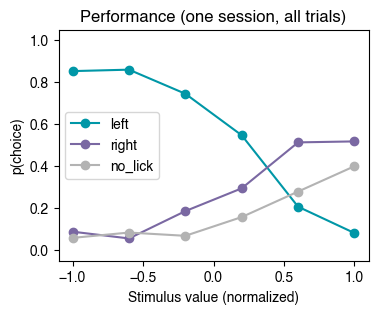

In [17]:
# Plot the psychometric curves
psy_colors = ['#0097A7', '#7A68A2', '0.7']
plt.figure(figsize=[4, 3])
for choice_label, ind_choice in trial_labels['choice'].items():
    plt.plot(stim_values, psychometric[ind_choice,:], '-o', color=psy_colors[ind_choice])
plt.ylim([-0.05, 1.05])
plt.ylabel('p(choice)')
plt.xlabel('Stimulus value (normalized)')
plt.legend(trial_labels['choice'].keys(), loc='center left')
plt.title('Performance (one session, all trials)');

We see that performance, when averaging across all trials in a session, does not seem to be very good. Below we explore whether these averages are the result of the animal switching between behavioral states with different levels of engagement in the task.

## Estimate behavioral states from choices and trial outcomes

Here, we use a Hidden Markov Model with Generalized Linear Model emissions (GLM-HMM) to automatically characterize the dynamics in performance across trials in a session. This model estimates different performance states according to the choices the animal makes.

In [18]:
# Format the inputs for model fitting
choice = trial_data['choice'].to_numpy().astype(int)  # A 1-D array of ints indicating the choice on each trial
stim = trial_data['normalized_stim'].to_numpy()       # A 1-D array with the stim value on each trial
constant = np.ones(len(trial_data))                   # A constant to fit a bias term in our GLM
inputs = np.stack((stim, constant), axis=1)

In this example, we will set the number of states of the model to 3. In general, one would instead use a model-selection process (as described in the associated paper {cite}`Hulsey2024`) to estimate the appropriate number of states.

In [19]:
# Model parameters
num_states = 3                             # Number of states of the HMM
obs_dim = 1                                # One observed dimension: the animal's choice.
num_categories = len(np.unique(choice))    # Number of possible choices
input_dim = inputs.shape[1]                # Two dimensions: stim value and bias coefficient

In [20]:
# Define the model
hmm = ssm.HMM(num_states, obs_dim, input_dim, observations="input_driven_obs", 
              observation_kwargs=dict(C=num_categories), transitions="standard")

We can now fit the model to our data.

In [21]:
# Let's fix the random seeds, so everyone gets the same results on this example notebook
np.random.seed(1)
random.seed(1)

# Fit an HMM to our data
TOL = 10**-4
N_iters = 1000
train_ll = hmm.fit(choice[:,None], inputs=inputs, method="em", num_iters=N_iters, tolerance=TOL)

  0%|          | 0/1000 [00:00<?, ?it/s]

Note that we fixed the random seeds above, so this notebook always gives the same results. In general, you may want to instead run multiple instances of the fitting procedure and take the best fit.

After fitting the model, we can get the probability of being in each state for each trial.

In [22]:
# Get the array of posterior prob for each state on each trial (nTrials, nStates)
posterior_probs = hmm.expected_states(choice[:,None], input=inputs)[0]

For this example, we will simply pick the state with maximum probability on each trial (and add it to our dataframe of trials), but you could also decide to include only states with probability above some threshold (*i.e.*, 80%) and set intances below this threshold to "undetermined".

In [23]:
# Estimate the state with maximum probability for each trial and add it to our dataframe
hmm_state = posterior_probs.argmax(axis=1)
trial_data['hmm_state'] = hmm_state

We can now plot these probabilities together with the choice on each trial.

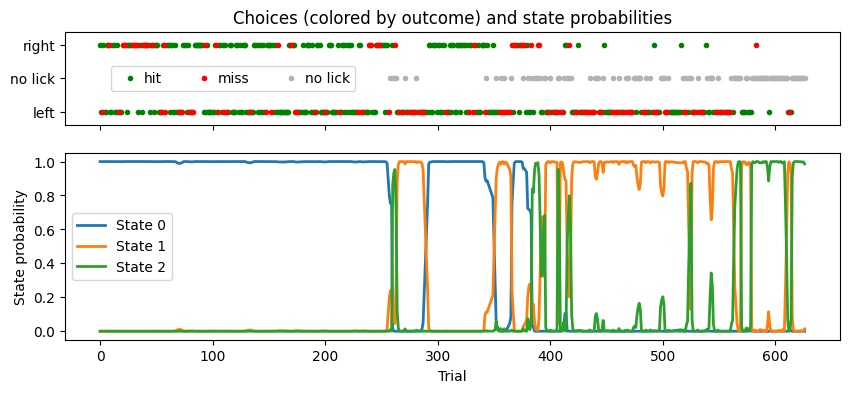

In [24]:
# Plot choices (colored by outcome) and probability of each state for each trial
outcomes_to_plot = {'hit':'g', 'miss':'r'}
ms = 3
state_colors = plt.get_cmap("tab10")(range(num_states))

fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 2]}, sharex=True, figsize=(10, 4))

axs[0] = plt.subplot(2, 1, 1)
for this_outcome, this_color in outcomes_to_plot.items():
    outcome_ind = trial_labels['outcome'][this_outcome]
    idx = np.flatnonzero(trial_data['outcome'] == outcome_ind)
    axs[0].plot(idx, choice[idx], 'o', color=this_color, ms=ms, label=this_outcome)
no_lick_idx = np.flatnonzero(choice==trial_labels['choice']['no_lick'])
axs[0].plot(no_lick_idx, np.tile(0.5, len(no_lick_idx)), 'o', color='0.7', ms=ms, label='no lick')
axs[0].set_yticks([0, 0.5, 1], ['left', 'no lick', 'right'])
axs[0].set_ylim([-0.2, 1.2])
axs[0].legend(loc='center left', ncol=3, bbox_to_anchor=(0.05, 0.5), handletextpad=0)
axs[0].set_title('Choices (colored by outcome) and state probabilities')

for inds in range(num_states):
    axs[1].plot(posterior_probs[:,inds], lw=2, color=state_colors[inds])
axs[1].set_ylabel('State probability')
axs[1].set_xlabel('Trial')
axs[1].legend([f'State {s}' for s in range(num_states)], loc='center left');

Note that **State 0** has a high probability when the animal makes mostly correct choices during the first half of the session (*optimal performance*). **State 1** has a high probability when the animal licks mostly to the left (*biased performance*). And **State 2** has a high probability when the animal is not licking much (*disengaged state*).

Since we have an estimate of the performance state for each trial, we can calculate the psychometric performance for each state.

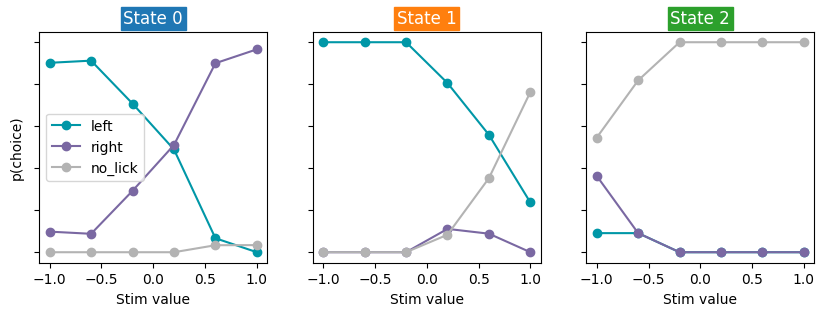

In [25]:
# Plot psychometric performance for each state
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(10, 3))
for state in range(num_states):
    trial_data_this_state = trial_data.query('hmm_state==@state')
    stim_vals, psychometric = estimate_psychometric(trial_data_this_state, trial_labels)
    for ind_choice, choice_probs in enumerate(psychometric):
        axs[state].plot(stim_vals, choice_probs, '-o', color=psy_colors[ind_choice])
    axs[state].set_ylim([-0.05, 1.05])
    axs[state].set_xlabel('Stim value')
    scolor = state_colors[state] 
    axs[state].set_title(f'State {state}', color='w', bbox={'fc':scolor, 'ec':scolor, 'pad': 2})
    axs[state].set_yticks(np.arange(0, 1.1, 0.2))
    if state==0:
        axs[state].set_ylabel('p(choice)')
        axs[state].legend(trial_labels['choice'].keys())
    else:
        axs[state].set_yticklabels('')

Consistent with the observations above, **State 0** shows sharp psychometric curves that clearly depend on the stimulus value (*optimal*), **State 1** shows a low probability of licking right (*biased*), and **State 2** shows a high probability of no licking for most stimulus values (*disengaged*). 

## Evaluate the dynamics of arousal and uninstructed movements

We now evaluate how arousal (estimated from pupil diameter) and uninstructed movements (such as running), relate to the behavioral states estimated from the animal's choices.

We start by loading the traces of these additional behavioral measures from our NWB file. Note that here, we focus on the value of each behavioral measure right before the stimulus presentation on each trial. 

In [26]:
behav_measures_labels = ['pupil_diameter', 'running_speed']
behav_measures = {}
for indb, measure in enumerate(behav_measures_labels):
    bmeasure_ts = nwb.get_acquisition(measure).timestamps[:]
    bmeasure_vals = nwb.get_acquisition(measure).data[:]
    
    # Find index of timestamp right before the trial start
    idx = np.searchsorted(bmeasure_ts, trial_data['start_time'], side='right')-1
    last_ts_before_trial_start = bmeasure_ts[idx]
    bmeasure_at_trial_start = bmeasure_vals[idx]
    
    behav_measures[measure] = {'ts':last_ts_before_trial_start, 'value':bmeasure_at_trial_start}

Once loaded, we can plot the value of each behavioral measure next to the probability of being in each state.

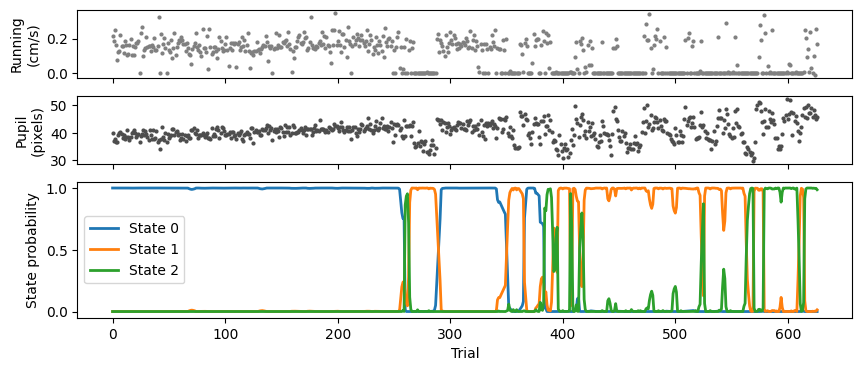

In [27]:
fig, axs = plt.subplots(3, 1, gridspec_kw={'height_ratios': [1, 1, 2]}, sharex=True, figsize=(10, 4))
axs[0].plot(behav_measures['running_speed']['value'],'.', color='0.5', ms=4, lw=0.1)
axs[0].set_ylabel('Running\n(cm/s)')
axs[1].plot(behav_measures['pupil_diameter']['value'],'.', color='0.3', ms=4, lw=0.1)
axs[1].set_ylabel('Pupil\n(pixels)')
for inds in range(num_states):
    axs[2].plot(posterior_probs[:,inds], lw=2, color=state_colors[inds])
axs[2].set_ylabel('State probability')
axs[2].set_xlabel('Trial')
axs[2].legend([f'State {s}' for s in range(num_states)], loc='center left');

From these plots (from one example session) we can see a few things:
1. The biased and disengaged states (State 2 and 3) seem to correlate with little running.
2. The optimal state (State 0) correlates with intermediate levels (and low variability) of pupil size.

# Evaluate the relation between arousal and performance

From these data, we can also evaluate the relation between arousal (as indexed by pupil size) and performance.

We first normalize the pupil size and estimate the probability of being in the optimal state (State 0) for each pupil size range.

In [28]:
pupil = behav_measures['pupil_diameter']['value']
normalized_pupil = (pupil-pupil.min())/(pupil.max()-pupil.min())

state_to_plot = 0

bin_width = 0.1
bin_edges = np.arange(0, 1, bin_width)
prob_state_mean = np.empty(len(bin_edges))
prob_state_std = np.empty(len(bin_edges))
n_trials_each_bin = np.empty(len(bin_edges), dtype=int)
for inde, low_edge in enumerate(bin_edges):
    high_edge = low_edge + bin_width
    trials_this_bin = (normalized_pupil>low_edge) & (normalized_pupil<=high_edge)
    prob_state_mean[inde] = np.mean(posterior_probs[trials_this_bin, state_to_plot])
    prob_state_std[inde] = np.std(posterior_probs[trials_this_bin, state_to_plot])
    n_trials_each_bin[inde] = np.sum(trials_this_bin)

Note: In the manuscript, a different normalization (between 0 and max) is used because the analysis encompasses multiple sessions from each animal. Here we normalize from min to max, such that each bin contain at least 1 trial.

Below is how many trials had a particular pupil size range:

In [29]:
n_trials_each_bin

array([  6,  26,  43,  96, 179, 146,  79,  27,  18,   6])

We can now plot the probability of being in the optimal state (State 0) for each pupil size range.

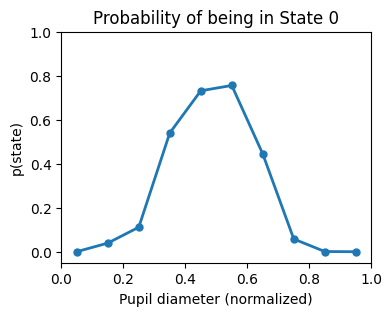

In [30]:
plt.figure(figsize=[4, 3])
color_this_state = state_colors[state_to_plot]
plt.plot(bin_edges+bin_width/2, prob_state_mean,'.-', ms=10, lw=2, color=color_this_state)
plt.ylabel('p(state)')
plt.xlabel('Pupil diameter (normalized)')
plt.ylim([-0.05,1])
plt.xlim([0,1])
plt.title(f'Probability of being in State {state_to_plot}');

We see that the probability of being in the optimal state is highest when the pupil is at an intermediate size, resulting in an inverted-U relationship between arousal and performance. 

---------------------------